In [1]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
df.shape

(920, 16)

In [5]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [6]:
# Check the missing values
df.isnull().sum().sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64

In [7]:
# Check the percentage of missing values
df.isnull().sum().sort_values(ascending=False) / len(df) * 100

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

In [8]:
# Seperate the columns into numerical, bolean and categorical

categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

print(f'Numerical columns: {numeric_cols}')
print(f'Boolean columns: {bool_cols}')
print(f'Categorical columns: {categorical_cols}')

Numerical columns: ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']
Boolean columns: ['fbs', 'exang']
Categorical columns: ['thal', 'ca', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex', 'num']


In [9]:
# Fill the missing values

imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

df.isnull().sum().sort_values(ascending=False)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [10]:
# Encode the categorical and object column

encoder = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(encoder.fit_transform)

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63.0,1,Cleveland,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0,0
1,2,67.0,1,Cleveland,0,160.0,286.0,0,0,108.0,1,1.5,1,3,1,2
2,3,67.0,1,Cleveland,0,120.0,229.0,0,0,129.0,1,2.6,1,2,2,1
3,4,37.0,1,Cleveland,2,130.0,250.0,0,1,187.0,0,3.5,0,0,1,0
4,5,41.0,0,Cleveland,1,130.0,204.0,0,0,172.0,0,1.4,2,0,1,0


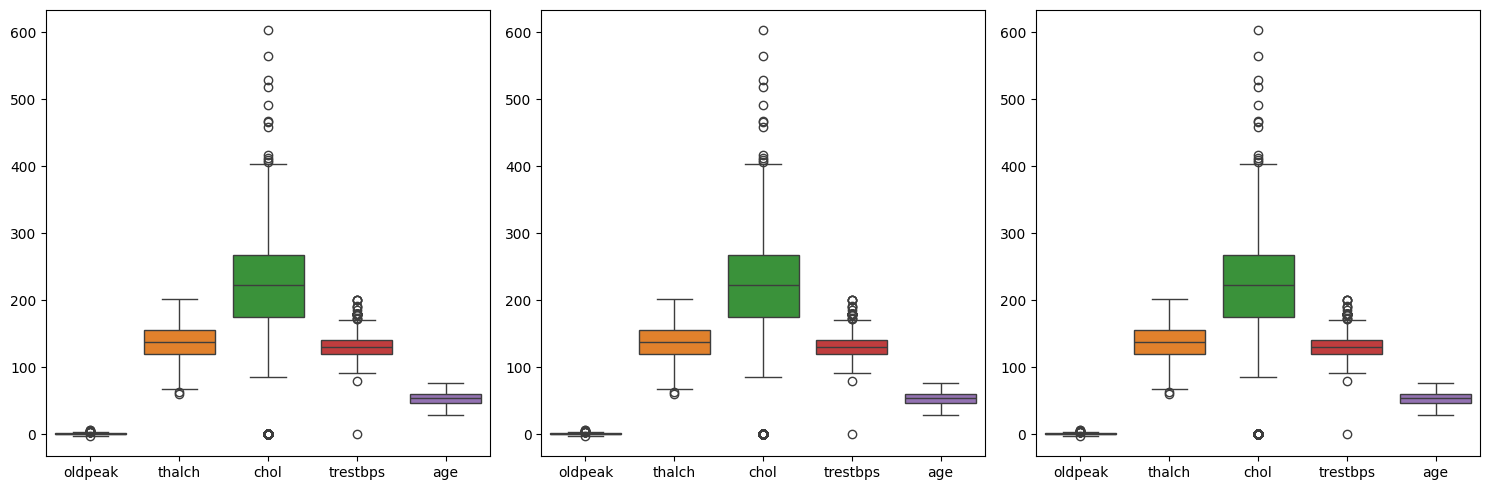

In [11]:
# Check the outliers in the data of numerical column

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df[numeric_cols], ax=ax[0])
sns.boxplot(data=df[numeric_cols], ax=ax[1])
sns.boxplot(data=df[numeric_cols], ax=ax[2])
plt.tight_layout()

In [12]:
# Remove the outliers

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

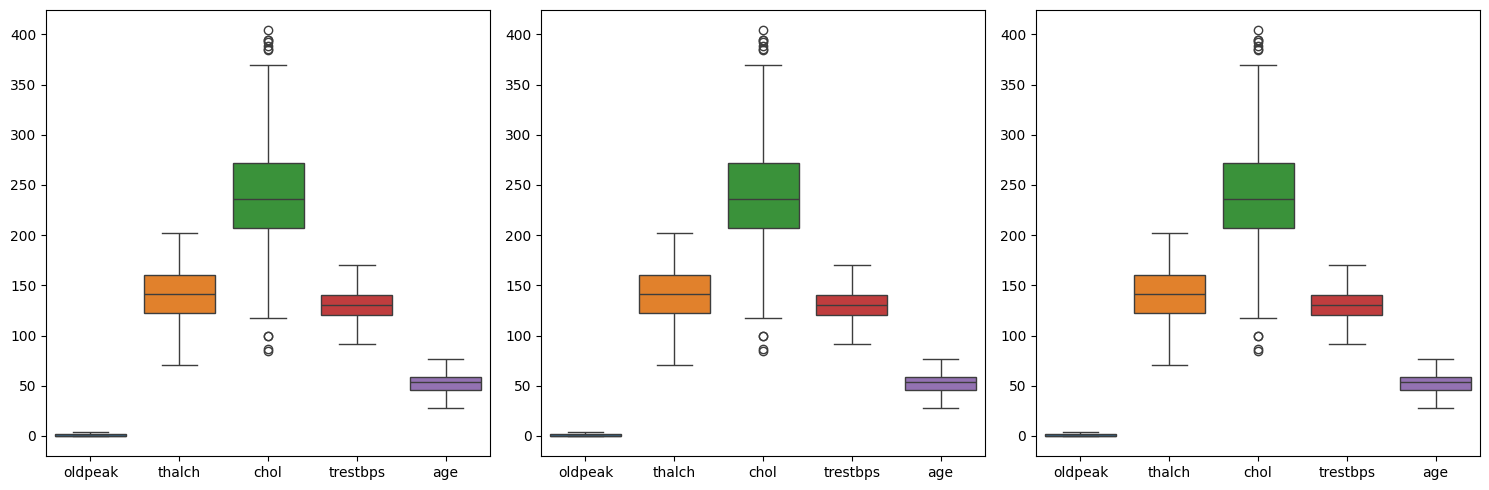

In [13]:
# Check the outliers

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df[numeric_cols], ax=ax[0])
sns.boxplot(data=df[numeric_cols], ax=ax[1])
sns.boxplot(data=df[numeric_cols], ax=ax[2])
plt.tight_layout()

In [14]:
# Drop the id column
df = df.drop('id', axis=1)

In [15]:
# Split the data into train and test

X = df.drop(['dataset', 'num'], axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Create a list of models

models = [LogisticRegression(),
          KNeighborsClassifier(),
          SVC(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          AdaBoostClassifier(),
          GradientBoostingClassifier(),
          XGBClassifier()]

# Import necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{type(model).__name__}:')
    print('Accuracy score:', accuracy_score(y_test, y_pred))
    print('Confusion matrix:', confusion_matrix(y_test, y_pred))
    print('Classification report:', classification_report(y_test, y_pred))
    print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
    print('Mean squared error:', mean_squared_error(y_test, y_pred))
    print('R2 score:', r2_score(y_test, y_pred))
    print()

LogisticRegression:
Accuracy score: 0.6453900709219859
Confusion matrix: [[69  5  0  2  1]
 [17 22  1  1  0]
 [ 2  5  0  0  0]
 [ 4  7  1  0  0]
 [ 1  2  1  0  0]]
Classification report:               precision    recall  f1-score   support

           0       0.74      0.90      0.81        77
           1       0.54      0.54      0.54        41
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         4

    accuracy                           0.65       141
   macro avg       0.26      0.29      0.27       141
weighted avg       0.56      0.65      0.60       141

Mean absolute error: 0.5886524822695035
Mean squared error: 1.2553191489361701
R2 score: -0.1076247115213913

KNeighborsClassifier:
Accuracy score: 0.5177304964539007
Confusion matrix: [[66  8  1  2  0]
 [30  7  1  2  1]
 [ 3  4  0  0  0]
 [ 9  3  0  0  0]
 [ 1  2  1  0  0]]
Classification report:               precision  

In [17]:
# Give me the best model based on accuracy score

models = [LogisticRegression(),
          KNeighborsClassifier(),
          SVC(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          AdaBoostClassifier(),
          GradientBoostingClassifier(),
          XGBClassifier()]

from sklearn.model_selection import GridSearchCV

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{type(model).__name__}:')
    print('Accuracy score:', accuracy_score(y_test, y_pred))
    print()

LogisticRegression:
Accuracy score: 0.6453900709219859

KNeighborsClassifier:
Accuracy score: 0.5177304964539007

SVC:
Accuracy score: 0.5460992907801419

DecisionTreeClassifier:
Accuracy score: 0.5390070921985816

RandomForestClassifier:
Accuracy score: 0.624113475177305

AdaBoostClassifier:
Accuracy score: 0.5673758865248227

GradientBoostingClassifier:
Accuracy score: 0.6099290780141844

XGBClassifier:
Accuracy score: 0.574468085106383



In [18]:
model.predict([[ 62, 0,0, 140, 268.0, 0, 0, 160.0, 0, 3.6, 0, 2,1]])


array([2], dtype=int64)

In [19]:
df.head(10)

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63.0,1,Cleveland,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0,0
1,67.0,1,Cleveland,0,160.0,286.0,0,0,108.0,1,1.5,1,3,1,2
2,67.0,1,Cleveland,0,120.0,229.0,0,0,129.0,1,2.6,1,2,2,1
3,37.0,1,Cleveland,2,130.0,250.0,0,1,187.0,0,3.5,0,0,1,0
4,41.0,0,Cleveland,1,130.0,204.0,0,0,172.0,0,1.4,2,0,1,0
5,56.0,1,Cleveland,1,120.0,236.0,0,1,178.0,0,0.8,2,0,1,0
6,62.0,0,Cleveland,0,140.0,268.0,0,0,160.0,0,3.6,0,2,1,3
7,57.0,0,Cleveland,0,120.0,354.0,0,1,163.0,1,0.6,2,0,1,0
8,63.0,1,Cleveland,0,130.0,254.0,0,0,147.0,0,1.4,1,1,2,2
9,53.0,1,Cleveland,0,140.0,203.0,1,0,155.0,1,3.1,0,0,2,1
